In [4]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv\r\n0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\r\n0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\r\n0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\r\n0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\r\n0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\r\n0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\r\n0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\r\n0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\r\n0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\r\n0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\r\n0.22489,12.5,7.87,0,0.524,,94.3,6.3467,5,311,15.2,392.52,20.45,15\r\n0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\r\n0.09378,12.5,7.87,0,0.524,5.889,39,5.4509

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

In [5]:
boston_data = pd.read_csv("BostonHousing.csv")
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
boston_data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

There are 5 missing values in the dataset so its better to raplace them.

In [21]:
boston_data["rm"].fillna(boston_data["rm"].mean(), inplace=True)

In [22]:
boston_data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Now there are no missing values in the dataset.

In [7]:
boston_data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

All the values are numerical.

In [23]:
boston_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


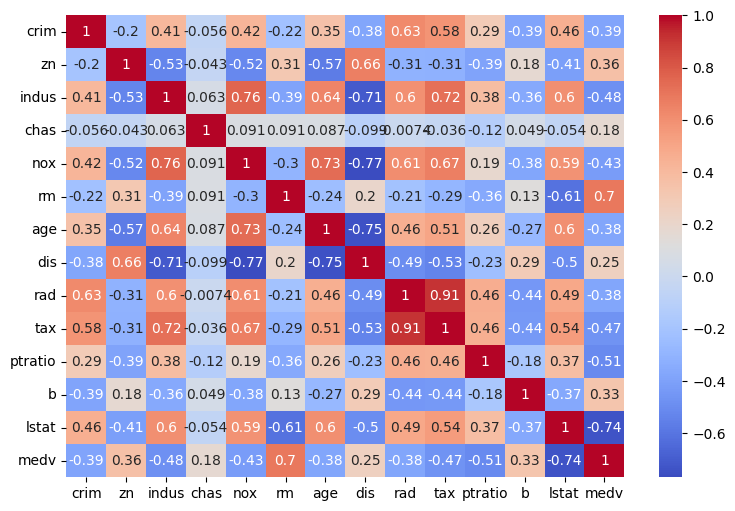

In [24]:
import seaborn as sns
plt.figure(figsize=(9, 6))
sns.heatmap(boston_data.corr(), annot=True, cmap="coolwarm")
plt.show()

rm is very positively related with the target variavle i.e medv while lstat is very negatively related with it.

In [25]:
X = boston_data.drop("medv", axis=1)
y = boston_data.medv

In [26]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [27]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

# Split the dataset

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Traint the Linear Regression model

In [29]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

# Predict the target variable

In [30]:
y_predicted = LR_model.predict(X_test)
y_predicted

array([32.90889087, 18.37038389, 17.04267621, 33.55647234, 17.61943319,
       29.00107937, 16.16462417, 26.93090625, 12.89647631, 20.91699693,
       34.76204328, 29.02802098, 18.94769314, 27.64782956, 14.40813779,
       21.80904031, 20.5729431 ,  6.19993051, 13.60955404, 30.17362418,
       13.88070301, 19.16530312, 23.49445798, 41.33594621, 18.82431063,
       33.84288805, 30.37668028, 25.90893775, -0.27789818, 18.35417119,
       16.31060047, 32.47073602, 24.92162729, 17.18965876, 24.67514721,
       22.23774999, 17.37617288, 33.88947362, 14.3995251 , 21.05348799,
       28.39158934, 38.97927443, 31.29122098, 33.66195601, 28.08382878,
       30.43207229, 30.53421057, 18.95565222, 20.4766268 , 19.46027246,
       26.17695357, 19.3588401 , 20.38421963, 20.43654148, 21.73097666,
        8.56436992, 15.0080042 , 21.39299653, 21.28015742, 24.54658439,
       24.23109115,  7.43684243, 19.12586342, 34.89835275,  9.09472391,
       22.81115905, 22.85303313, 15.99901335, 21.25936362, 13.01

# Mean Squared Error (MSE)

In [31]:
mse = mean_squared_error(y_test, y_predicted)
print(f"The Mean Squared Error of the model is {mse}")

The Mean Squared Error of the model is 25.009160564830346


# R-squared value

In [33]:
r_squared_value = r2_score(y_test, y_predicted)
print(f"R squared value of the model is {r_squared_value}")

R squared value of the model is 0.726017645317236


# Plot the Regression Line

Plot the regression line along with actual data points.

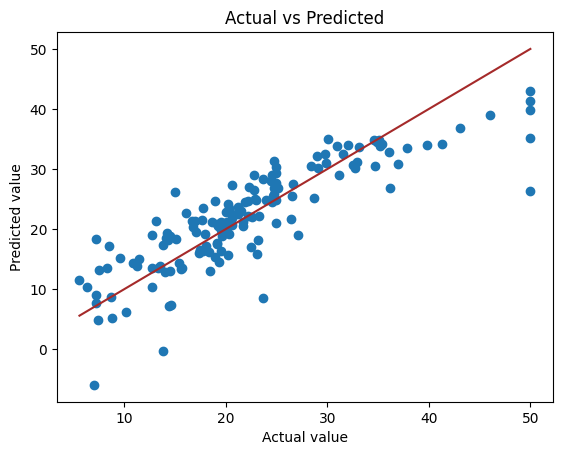

In [66]:
plt.subplots()
plt.scatter(y_test, y_predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="brown" )

plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted")
plt.show()



# Model's Performance

Scatter plot the actual target variable with the predicted one.

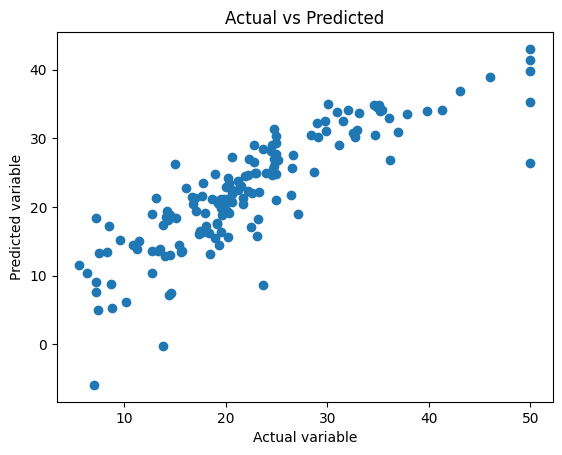

In [51]:
plt.figure()
plt.scatter(y_test, y_predicted)
plt.xlabel("Actual variable")
plt.ylabel("Predicted variable")
plt.title("Actual vs Predicted")
plt.show()

# Features' imapct on target

Interpret the coefficients of the linear regression model. Explain the impact of each feature on the target variable

In [53]:
coefficients = LR_model.coef_
features = [column for column in X_train.columns]
coef_df = pd.DataFrame({"Feature": features, "Coefficient": coefficients})
coef_df

,Feature,Coefficient
0,crim,-0.132254
1,zn,0.055567
2,indus,0.075308
3,chas,1.387960
4,nox,-16.650974
5,rm,3.657390
6,age,0.009519
7,dis,-1.348919
8,rad,0.362951
9,tax,-0.011594


In [55]:
for index, row in coef_df.iterrows():
  if row["Coefficient"] >= 0:
    print(f"{row['Feature']} is directly related with the target variable.")
  else:
    print(f"{row['Feature']} is inversely related with the target variable.")

crim is inversely related with the target variable.
zn is directly related with the target variable.
indus is directly related with the target variable.
chas is directly related with the target variable.
nox is inversely related with the target variable.
rm is directly related with the target variable.
age is directly related with the target variable.
dis is inversely related with the target variable.
rad is directly related with the target variable.
tax is inversely related with the target variable.
ptratio is inversely related with the target variable.
b is directly related with the target variable.
lstat is inversely related with the target variable.
